In [12]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [13]:
from custom_models import custom_model, old_model
from data_augmentation import DataAugmentation
from data_preprocessing import Preprocessing
from config import ConstantConfig, DatasetConfig
ENCODER = ConstantConfig().ENCODER
file_path = DatasetConfig().file_path

In [14]:
preprocessing = Preprocessing()
augmentation = DataAugmentation()
img_data = augmentation.process_data()
labels_train, labels_test, imgs_train, imgs_test = preprocessing.train_test_split(img_data)
model = old_model()

100%|██████████| 204/204 [03:06<00:00,  1.09it/s]


In [15]:
batch_size = 64
epochs = 50
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5)
steps_per_epoch = 5

In [16]:
model.fit(imgs_train, labels_train, batch_size=batch_size, epochs=epochs,
                       validation_data=(imgs_test, labels_test), callbacks=[early_stopping])

Epoch 1/50
646/646 [==============================] - 58s 88ms/step - loss: 1.9776 - accuracy: 0.4685 - val_loss: 1.3736 - val_accuracy: 0.6371
Epoch 2/50
646/646 [==============================] - 57s 88ms/step - loss: 1.2479 - accuracy: 0.6593 - val_loss: 1.1659 - val_accuracy: 0.6858
Epoch 3/50
646/646 [==============================] - 59s 92ms/step - loss: 1.0841 - accuracy: 0.7033 - val_loss: 1.0820 - val_accuracy: 0.7094
Epoch 4/50
646/646 [==============================] - 58s 90ms/step - loss: 0.9686 - accuracy: 0.7338 - val_loss: 1.0234 - val_accuracy: 0.7170
Epoch 5/50
646/646 [==============================] - 57s 89ms/step - loss: 0.8936 - accuracy: 0.7530 - val_loss: 0.9970 - val_accuracy: 0.7274
Epoch 6/50
646/646 [==============================] - 58s 90ms/step - loss: 0.8290 - accuracy: 0.7735 - val_loss: 0.9551 - val_accuracy: 0.7440
Epoch 7/50
646/646 [==============================] - 58s 90ms/step - loss: 0.7743 - accuracy: 0.7868 - val_loss: 0.9193 - val_accuracy:

ა


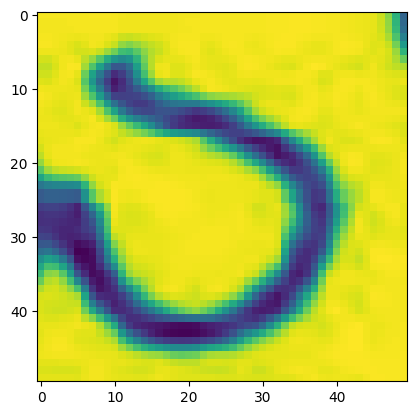

In [11]:
print(ENCODER.inverse[1])
plt.figure()
plt.imshow(img_data[1][0])
plt.grid(False)
plt.show()

In [8]:
imgs = np.array([val for ob in img_data.values() for val in ob])

labels = []
for key, value in img_data.items():
    labels.extend([key]* len(value))
labels = np.array(labels)

NameError: name 'np' is not defined

In [ ]:
imgs.shape, labels.shape

((48625, 50, 50, 1), (48625,))

In [ ]:
labels, imgs = shuffle(labels, imgs)
split = .75
labels_train = labels[:int(len(labels) * split)]
labels_test = labels[int(len(labels) * split):]

imgs_train = imgs[:int(len(imgs) * split)]
imgs_test = imgs[int(len(imgs) * split):]

In [ ]:
model = custom_model()

In [ ]:
batch_size = 16
epochs = 20
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2)

In [ ]:
labels_train.shape

(36468,)

In [ ]:
model.fit(imgs_train, labels_train, batch_size=batch_size, epochs=epochs, validation_data=(imgs_test, labels_test), callbacks=[early_stopping])

Epoch 1/20


ValueError: in user code:

    File "c:\Users\annch\anaconda3\envs\ocr_env\lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\annch\anaconda3\envs\ocr_env\lib\site-packages\keras\engine\training.py", line 1268, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\annch\anaconda3\envs\ocr_env\lib\site-packages\keras\engine\training.py", line 1249, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\annch\anaconda3\envs\ocr_env\lib\site-packages\keras\engine\training.py", line 1051, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\annch\anaconda3\envs\ocr_env\lib\site-packages\keras\engine\training.py", line 1109, in compute_loss
        return self.compiled_loss(
    File "c:\Users\annch\anaconda3\envs\ocr_env\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\annch\anaconda3\envs\ocr_env\lib\site-packages\keras\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\annch\anaconda3\envs\ocr_env\lib\site-packages\keras\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\annch\anaconda3\envs\ocr_env\lib\site-packages\keras\losses.py", line 1984, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\annch\anaconda3\envs\ocr_env\lib\site-packages\keras\backend.py", line 5559, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 34) are incompatible


In [17]:
import numpy as np
labels_pred = np.argmax(model.predict(imgs_test), axis=1)

228/228 [==============================] - 2s 8ms/step


In [18]:
cm = confusion_matrix(labels_test, labels_pred, labels=list(ENCODER.inverse.keys()))

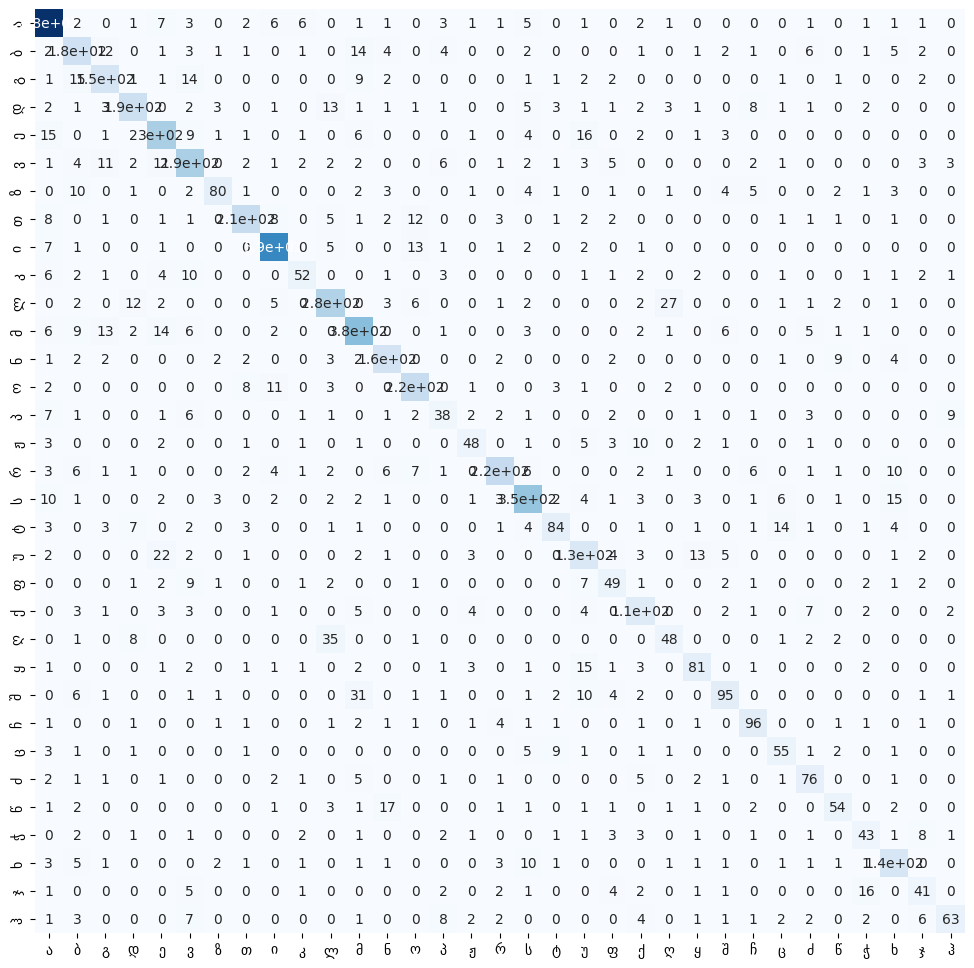

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, cbar=False, cmap='Blues', xticklabels=list(ENCODER.keys()), yticklabels=list(ENCODER.keys()))
plt.show()

In [20]:
model.save('geomodel.model', save_format='h5')

In [18]:
keras.models.load_model('geomodel.model')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 36: invalid continuation byte

In [28]:
import cv2
def test_model(file_path):
    img_vector = cv2.imdecode(np.fromfile(file_path, dtype=np.uint8),  cv2.IMREAD_GRAYSCALE).astype("float32")
    img_vector = cv2.resize(img_vector, (50, 50), interpolation = cv2.INTER_AREA) / 255
    img_vector = np.expand_dims(img_vector,-1)
    print(np.array([img_vector]).shape)
    pred_letter = np.argmax(model.predict(np.array([img_vector])), axis=-1)
    pred_letter = ENCODER.inverse[pred_letter[0]]
    return pred_letter

test_model('result\word0_0-1_6.png')
    

(1, 50, 50, 1)
1/1 [==============================] - 0s 22ms/step


'შ'

In [9]:
from datasets import load_dataset

dataset = load_dataset("AnaChikashua/handwriting", split='train')

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to C:/Users/annch/.cache/huggingface/datasets/AnaChikashua___imagefolder/AnaChikashua--handwriting-2104e8ce1bab6614/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.


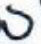

In [17]:
dataset[0]['image']